In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
subs = pd.read_csv("data/auctions.csv", usecols = ['date', 'country'], dtype = {"auction_type_id": np.float16, "platform": np.int8, "ref_type_id": np.int8, "source_id": np.int8})
evts = pd.read_csv("data/events.csv",usecols = ['date', 'device_countrycode'], dtype = {"event_id": np.int16, "application_id": np.int16})
inst = pd.read_csv("data/installs.csv", usecols = ['created', 'device_countrycode'], dtype = {"application_id": np.int16, "click_hash": np.float16})
clks = pd.read_csv("data/clicks.csv.gzip", usecols = ['created', 'country_code'], dtype = {"advertiser_id": np.int8, "action_id": np.float16, "source_id": np.int8, "carrier_id": np.float16, "brand": np.float16, "touchX": np.float16, "touchY": np.float16})

In [3]:
desc = pd.read_json("data/desc.json")

In [4]:
desc

,clicks,installs,events,auctions
action_id,"{'desc': 'internal id for an action', 'transfo...",NaN,NaN,NaN
advertiser_id,"{'desc': 'internal id for the advertiser, Jamp...",NaN,NaN,NaN
agent_device,{'desc': 'agent for the device the click was p...,NaN,NaN,NaN
application_id,NaN,"{'desc': 'internal id for the installed app', ...",{'desc': 'internal id for the event on which t...,NaN
attributed,NaN,{'desc': 'whether the install was attributed t...,{'desc': 'whether the event was attributed to ...,NaN
auction_type_id,NaN,NaN,NaN,"{'desc': 'type of auction', 'transformation': ..."
brand,"{'desc': 'device brand', 'transformation': 'La...",NaN,NaN,NaN
carrier,NaN,NaN,"{'desc': 'device's mobile carrier', 'transform...",NaN
carrier_id,{'desc': 'Id for the mobile carrier of the dev...,NaN,NaN,NaN
click_hash,NaN,"{'desc': 'hash for the install (like an id)', ...",NaN,NaN


# Veo qué tengo en los datos

In [5]:
inst.dtypes

created               object
device_countrycode     int64
dtype: object

In [6]:
subs.dtypes

country     int64
date       object
dtype: object

In [7]:
subs.head(1)

,country,date
0,6333597102633388268,2019-03-11 14:18:33.290763


In [8]:
clks.dtypes

created         object
country_code     int64
dtype: object

In [9]:
clks.head(1)

,created,country_code
0,2019-03-06T22:42:12.755Z,6333597102633388268


In [10]:
inst.dtypes

created               object
device_countrycode     int64
dtype: object

In [11]:
inst.head(1)

,created,device_countrycode
0,2019-03-13 01:43:33.445,6333597102633388268


# ¿Cómo se comportan los datos según el país?

Analizo la información que tengo sobre los paises

In [12]:
subs["country"].head()

0    6333597102633388268
1    6333597102633388268
2    6333597102633388268
3    6333597102633388268
4    6333597102633388268
Name: country, dtype: int64

In [13]:
subs["country"].value_counts()

6333597102633388268    19571319
Name: country, dtype: int64

In [14]:
evts["device_countrycode"].head()

0    6333597102633388268
1    6333597102633388268
2    6333597102633388268
3    6333597102633388268
4    6333597102633388268
Name: device_countrycode, dtype: int64

In [15]:
evts["device_countrycode"].value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

In [16]:
clks["country_code"].head()

0    6333597102633388268
1    6333597102633388268
2    6333597102633388268
3    6333597102633388268
4    6333597102633388268
Name: country_code, dtype: int64

In [17]:
clks["country_code"].value_counts()

6333597102633388268    26351
Name: country_code, dtype: int64

In [18]:
inst["device_countrycode"].head()

0    6333597102633388268
1    6333597102633388268
2    6333597102633388268
3    6333597102633388268
4    6333597102633388268
Name: device_countrycode, dtype: int64

In [ ]:
paises_inst = inst["device_countrycode"].value_counts()
paises_inst

6333597102633388268    1820
2970470518450881158    1592
Name: device_countrycode, dtype: int64

Text(0.5,0,'Código de identificación del país')

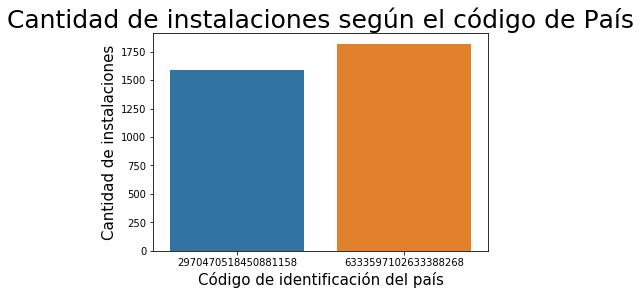

In [ ]:
## Visualizamos las instalaciones para cada país
grf = sns.barplot(x = paises_inst.index, y = paises_inst.values, orient = 'v')
grf.set_title("Cantidad de instalaciones según el código de País", fontsize = 25)
grf.set_ylabel("Cantidad de instalaciones", fontsize = 15)
grf.set_xlabel("Código de identificación del país", fontsize = 15)

## Quiero ver que información puedo encontrar en las fechas de las subastas, eventos, clicks e intalaciones



 Quiero hacer un conteo para la cantidad de subastas, eventos, clicks e instalaciones para cada fecha

In [ ]:
#Creo una función para contar según la fecha
def counter_by_date(df, date_name):
    df['real_date'] = pd.to_datetime(df[date_name], format='%Y%m%d %H:%M:%S.%f').dt.date
    return df['real_date'].value_counts()

In [ ]:
# Cuento las instalaciones
install_count = counter_by_date(inst, "created")
install_count

2019-03-12    472
2019-03-13    423
2019-03-07    393
2019-03-11    377
2019-03-09    368
2019-03-08    366
2019-03-10    351
2019-03-05    337
2019-03-06    325
Name: real_date, dtype: int64

In [ ]:
#Cuento los clicks
clicks_count = counter_by_date(clks, "created")
clicks_count

2019-03-12    5204
2019-03-11    4557
2019-03-10    3966
2019-03-13    3468
2019-03-09    3283
2019-03-07    2989
2019-03-08    2839
2019-03-05      31
2019-03-06      14
Name: real_date, dtype: int64

In [ ]:
#Cuento los eventos
events_count = counter_by_date(evts, "date")
events_count

2019-03-13    316267
2019-03-12    296665
2019-03-10    293091
2019-03-09    286221
2019-03-08    285535
2019-03-11    268884
2019-03-07    253706
2019-03-06    253505
2019-03-05    240549
Name: real_date, dtype: int64

In [ ]:
#Cuento las subastas 
auctions_count = counter_by_date(subs, "date")
auctions_count

## Grafico para que se visualize mejor el contraste entre los números

In [ ]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
plot1 = sns.lineplot(x = auctions_count.index, y = auctions_count.values)
plot1.set_title("Cantidad de subastas en función del tiempo", fontsize = 25)
plot1.set_xlabel("Fecha", fontsize = 15)
plot1.set_ylabel("Cantidad de subastas", fontsize = 15)

In [ ]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
plot1 = sns.lineplot(x = events_count.index, y = events_count.values)
plot1.set_title("Cantidad de eventos en función del tiempo", fontsize = 25)
plot1.set_xlabel("Fecha", fontsize = 15)
plot1.set_ylabel("Cantidad de eventos", fontsize = 15)

In [ ]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
plot1 = sns.lineplot(x = clicks_count.index, y = clicks_count.values)
plot1.set_title("Cantidad de clicks en función del tiempo", fontsize = 30)
plot1.set_xlabel("Fecha", fontsize = 18)
plot1.set_ylabel("Cantidad de clicks", fontsize = 18)

In [ ]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
plot1 = sns.lineplot(x = install_count.index, y = install_count.values)
plot1.set_title("Cantidad de instalaciones en función del tiempo", fontsize = 30)
plot1.set_xlabel("Fecha", fontsize = 18)
plot1.set_ylabel("Cantidad de instalaciones", fontsize = 18)